# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['mar del plata',
 'castro',
 'taolanaro',
 'hilo',
 'rikitea',
 'hermanus',
 'preobrazheniye',
 'albany',
 'atuona',
 'hasaki',
 'kyzyl-suu',
 'valparaiso',
 'siayan',
 'altamira',
 'sao jose da coroa grande',
 'qaanaaq',
 'tazovskiy',
 'chuy',
 'tsihombe',
 'aketi',
 'khatanga',
 'paradwip',
 'manado',
 'vaini',
 'kapaa',
 'hobart',
 'barrow',
 'mandan',
 'provideniya',
 'fairbanks',
 'jamestown',
 'puerto ayora',
 'barentsburg',
 'bolshegrivskoye',
 'punta arenas',
 'san quintin',
 'pineville',
 'bulgan',
 'vardo',
 'atkinson',
 'mahebourg',
 'tuktoyaktuk',
 'georgetown',
 'walvis bay',
 'mataura',
 'bonthe',
 'celestun',
 'binika',
 'yellowknife',
 'taltal',
 'busselton',
 'nikolskoye',
 'kodiak',
 'new smyrna beach',
 'bethel',
 'puerto madero',
 'necochea',
 'itacoatiara',
 'casablanca',
 'port alfred',
 'plainfield',
 'meadow lake',
 'sovetskiy',
 'elat',
 'ribeira grande',
 'grand river south east',
 'nchelenge',
 'chitrakonda',
 'gurgan',
 'ushuaia',
 'nioro',
 'lata',
 'guerr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather = pd.DataFrame({"City": cities})

weather["Country"] = ""     
weather["Latitude"] = ""
weather["Longitude"] = ""
weather["Cloudiness (%)"] = ""
weather["Humidity (%)"] = ""
weather["Max Temp (F)"] = ""
weather["Wind Speed (mph)"] = ""
weather["Date"] = "" 


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city 
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather.loc[index, "Date"] = weather_response["dt"]
        weather.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather.loc[index, "Max Temp (F)"] = weather_response["main"]["temp_max"]
        weather.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | mar del plata.
Processing Record 1  of Set 1 | castro.
Processing Record 2  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 3  of Set 1 | hilo.
Processing Record 4  of Set 1 | rikitea.
Processing Record 5  of Set 1 | hermanus.
Processing Record 6  of Set 1 | preobrazheniye.
Processing Record 7  of Set 1 | albany.
Processing Record 8  of Set 1 | atuona.
Processing Record 9  of Set 1 | hasaki.
Processing Record 10  of Set 1 | kyzyl-suu.
Processing Record 11  of Set 1 | valparaiso.
Processing Record 12  of Set 1 | siayan.
Processing Record 13  of Set 1 | altamira.
Processing Record 14  of Set 1 | sao jose da coroa grande.
Processing Record 15  of Set 1 | qaanaaq.
Processing Record 16  of Set 1 | tazovskiy.
Processing Record 17  of Set 1 | chuy.
Processing Record 18  of Set 1 | tsihombe.
City not found...skipping tsihombe.
Processing Record 19  of Set 1 | aketi.
Processing Re

In [29]:
weather_df.dtypes

City                 object
Country              object
Latitude            float64
Longitude           float64
Cloudiness (%)      float64
Humidity (%)        float64
Max Temp (F)        float64
Wind Speed (mph)    float64
Date                float64
dtype: object

In [30]:
# Convert data strings to float
weather["Cloudiness (%)"] = pd.to_numeric(weather["Cloudiness (%)"]).astype(float)
weather["Humidity (%)"] = pd.to_numeric(weather["Humidity (%)"]).astype(float)
weather["Latitude"] = pd.to_numeric(weather["Latitude"]).astype(float)
weather["Longitude"] = pd.to_numeric(weather["Longitude"]).astype(float)
weather["Max Temp (F)"] = pd.to_numeric(weather["Max Temp (F)"]).astype(float)
weather["Wind Speed (mph)"] = pd.to_numeric(weather["Wind Speed (mph)"]).astype(float)
weather["Date"] = pd.to_numeric(weather["Date"]).astype(float)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#Export DataFrame to CSV File
weather.to_csv("weather_df.csv")
weather.head()

,City,Country,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date
0,mar del plata,AR,-38.0023,-57.5575,7.0,81.0,46.94,4.00,1.652598e+09
1,castro,BR,-24.7911,-50.0119,100.0,98.0,54.59,2.89,1.652598e+09
2,taolanaro,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hilo,US,19.7297,-155.0900,77.0,98.0,72.28,1.99,1.652598e+09
4,rikitea,PF,-23.1203,-134.9692,100.0,72.0,75.83,20.85,1.652598e+09


In [32]:
len(weather)

636

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
weather.drop(weather[weather['Humidity (%)'] > 100].index, inplace = True)
weather

,City,Country,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date
0,mar del plata,AR,-38.0023,-57.5575,7.0,81.0,46.94,4.00,1.652598e+09
1,castro,BR,-24.7911,-50.0119,100.0,98.0,54.59,2.89,1.652598e+09
2,taolanaro,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hilo,US,19.7297,-155.0900,77.0,98.0,72.28,1.99,1.652598e+09
4,rikitea,PF,-23.1203,-134.9692,100.0,72.0,75.83,20.85,1.652598e+09
...,...,...,...,...,...,...,...,...,...
631,nouadhibou,MR,20.9310,-17.0347,100.0,75.0,68.40,18.63,1.652599e+09
632,coatesville,US,39.9832,-75.8238,100.0,97.0,65.48,2.35,1.652598e+09
633,nantucket,US,41.2835,-70.0995,100.0,98.0,60.94,5.75,1.652599e+09
634,hastings,GB,50.8552,0.5729,100.0,82.0,60.30,12.55,1.652599e+09


In [34]:
#  Get the indices of cities that have humidity over 100%.

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

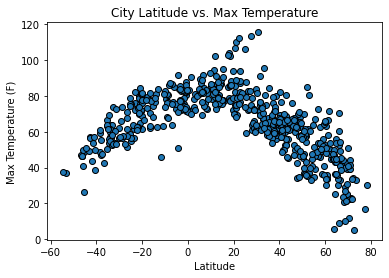

In [36]:
plt.scatter(weather["Latitude"],weather["Max Temp (F)"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

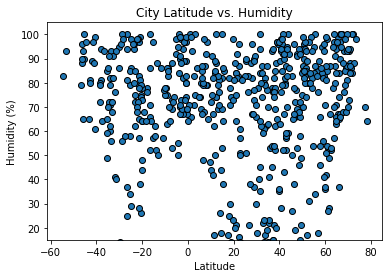

In [37]:
plt.scatter(weather["Latitude"],weather["Humidity (%)"],edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

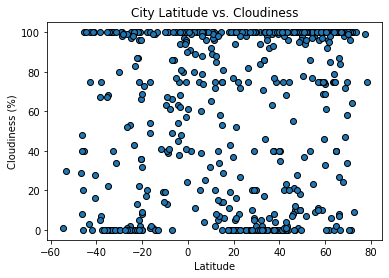

In [38]:
plt.scatter(weather["Latitude"],weather["Cloudiness (%)"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

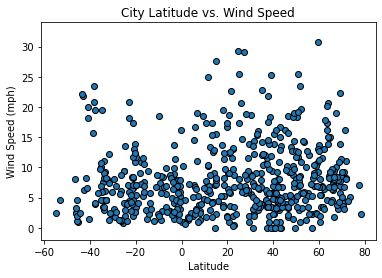

In [39]:
plt.scatter(weather["Latitude"],weather["Wind Speed (mph)"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [40]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather.loc[pd.to_numeric(weather["Latitude"]) > 0, :]
southern_df = weather.loc[pd.to_numeric(weather["Latitude"]) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.79x + 94.22
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


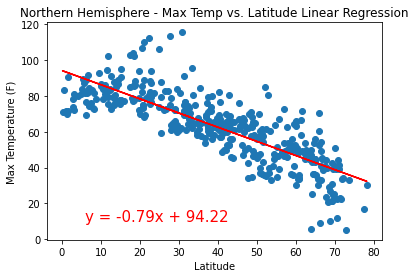

In [41]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Max Temp (F)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.72x + 82.92
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


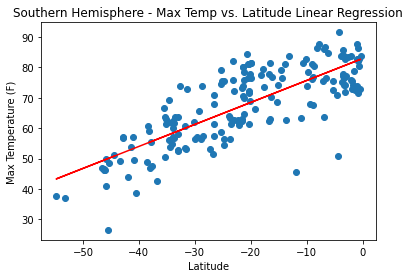

In [42]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Max Temp (F)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 59.09
The regression does not display much of a correlation between the data sets.


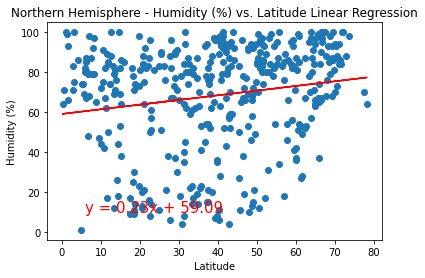

In [43]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Humidity (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 75.65
The regression does not display much of a correlation between the data sets.


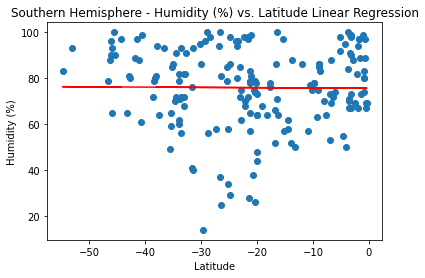

In [44]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Humidity (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.31x + 50.0
The regression does not display much of a correlation between the data sets.


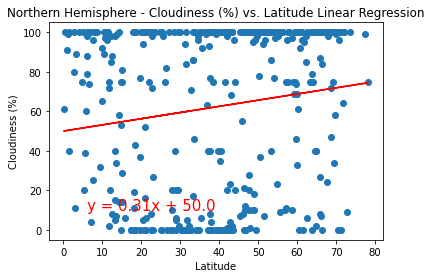

In [45]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Cloudiness (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.95x + 72.14
The regression does not display much of a correlation between the data sets.


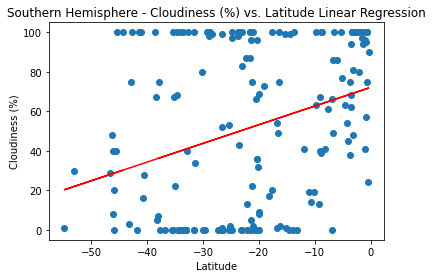

In [46]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Cloudiness (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 7.57
The regression does not display much of a correlation between the data sets.


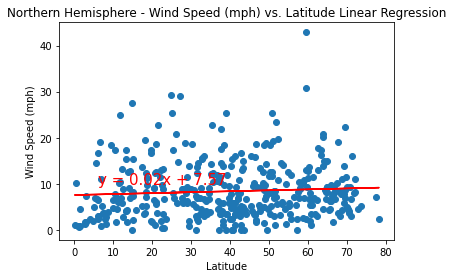

In [47]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Wind Speed (mph)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 5.71
The regression does not display much of a correlation between the data sets.


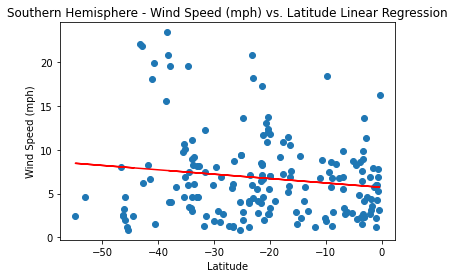

In [48]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Wind Speed (mph)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig12.png")
plt.show()